# NLP Project Pt. 5: Clustering by Writing Style

In [1]:
import pandas as pd
import numpy as np
import spacy
sp = spacy.load('en_core_web_lg')

corpus_df = pd.read_pickle('corpus_df_spacy3.pkl')
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,"[Palo Alto, Bay, Mountain View, New England, S..."
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,"[Inverness County, Nova Scotia, Ontario, Toron..."
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,"[California, Rome, Rome, Rome, California, Rom..."
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,"[Prospect Park, Kentucky, Tanglewood, East, Pr..."
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,"[Cuba, Harpers]"


In [ ]:
#drop extra columns?
corpus_df = corpus_df.drop(columns=['TEXT_NOUNS_ADJS', 'TEXT_NOUNS_VERBS', 'TEXT_NOUNS_VERBS_ADJS', 'TEXT_ENTS'])
corpus_df.head()

In [5]:
def POS_counter(docs):
    nouns = 0
    verbs = 0
    adjs = 0
    advs = 0
    text = sp(docs)
    for word in text:
        if word.pos_ == 'NOUN':
            nouns += 1
        if word.pos_ == 'VERB':
            verbs += 1
        if word.pos_ == 'ADJ':
            adjs += 1
        if word.pos_ == 'ADV':
            advs += 1
    pos_list = [nouns, verbs, adjs, advs]
    return pos_list

corpus_df['POS_COUNT'] = corpus_df.TEXT.map(lambda x: POS_counter(x))

corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,"[Palo Alto, Bay, Mountain View, New England, S...","[1705, 1451, 586, 614]"
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,"[Inverness County, Nova Scotia, Ontario, Toron...","[1231, 1266, 455, 682]"
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,"[California, Rome, Rome, Rome, California, Rom...","[763, 903, 284, 328]"
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,"[Prospect Park, Kentucky, Tanglewood, East, Pr...","[609, 603, 204, 187]"
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,"[Cuba, Harpers]","[407, 424, 147, 202]"


In [6]:
corpus_df.to_pickle("corpus_df_pos.pkl")

In [3]:
#UNPICKLE
corpus_df = pd.read_pickle('corpus_df_pos.pkl')

In [7]:
#0 - nouns
#1 - verbs
#2 - adjs
#3 - advs
corpus_df.POS_COUNT[0][0]

1705

In [20]:
def get_noun_score(rows):
    n = rows[0]
    v = rows[1]
    adj = rows[2]
    adv = rows[3]
    score = n/(n+v+adj+adv)
    return(score)

def get_verb_score(rows):
    n = rows[0]
    v = rows[1]
    adj = rows[2]
    adv = rows[3]
    score = v/(n+v+adj+adv)
    return(score)

def get_adj_score(rows):
    n = rows[0]
    v = rows[1]
    adj = rows[2]
    adv = rows[3]
    score = adj/(n+v+adj+adv)
    return(score)

def get_adv_score(rows):
    n = rows[0]
    v = rows[1]
    adj = rows[2]
    adv = rows[3]
    score = adv/(n+v+adj+adv)
    return(score)

In [21]:
get_noun_score(corpus_df.POS_COUNT[0])

0.39141414141414144

In [22]:
corpus_df['NOUN_SCORE'] = corpus_df.POS_COUNT.map(lambda x: get_noun_score(x))
corpus_df['VERB_SCORE'] = corpus_df.POS_COUNT.map(lambda x: get_verb_score(x))
corpus_df['ADJ_SCORE'] = corpus_df.POS_COUNT.map(lambda x: get_adj_score(x))
corpus_df['ADV_SCORE'] = corpus_df.POS_COUNT.map(lambda x: get_adv_score(x))
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,"[Palo Alto, Bay, Mountain View, New England, S...","[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,"[Inverness County, Nova Scotia, Ontario, Toron...","[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,"[California, Rome, Rome, Rome, California, Rom...","[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,"[Prospect Park, Kentucky, Tanglewood, East, Pr...","[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,"[Cuba, Harpers]","[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186


In [23]:
corpus_df[corpus_df['NOUN_SCORE'] == corpus_df.NOUN_SCORE.min()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE
714,https://www.newyorker.com/magazine/2007/07/02/...,THE MAHOGANY ELEPHANT,MAXIM BILLER,"June 25, 2007",['He waited for her for three months. He sorte...,1780,month photo book furniture letter map bed map ...,month photo book furniture letter large map be...,wait month sort photo rearrange book furniture...,wait month sort photo rearrange book furniture...,"[India, India, India, Bombay, Bombay, Zurich]","[192, 320, 101, 214]",0.232164,0.386941,0.122128,0.258767


In [24]:
corpus_df[corpus_df.NOUN_SCORE == corpus_df.NOUN_SCORE.max()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE
850,https://www.newyorker.com/magazine/2004/04/19/...,CAT 'N' MOUSE,STEVEN MILLHAUSER,"April 11, 2004",['The cat is chasing the mouse through the kit...,5608,cat mouse kitchen chair leg tabletop tableclot...,cat mouse kitchen blue chair leg tabletop red ...,cat chase mouse kitchen chair leg tabletop tab...,cat chase mouse kitchen blue chair leg tableto...,[],"[1475, 802, 364, 217]",0.516095,0.280616,0.127362,0.075927


In [34]:
print (corpus_df.NOUN_SCORE.mean(), corpus_df.NOUN_SCORE.min(), corpus_df.NOUN_SCORE.max())

0.38424759195473357 0.23216444981862153 0.5160951714485654


In [35]:
print(corpus_df.VERB_SCORE.mean(), corpus_df.VERB_SCORE.min(), corpus_df.VERB_SCORE.max())

0.3457881221049687 0.22373696872493987 0.4522058823529412


In [36]:
print(corpus_df.ADJ_SCORE.mean(), corpus_df.ADJ_SCORE.min(), corpus_df.ADJ_SCORE.max())

0.1332883362422634 0.07655502392344497 0.20789473684210527


In [37]:
print(corpus_df.ADV_SCORE.mean(), corpus_df.ADJ_SCORE.min(), corpus_df.ADJ_SCORE.max())

0.13667594969803432 0.07655502392344497 0.20789473684210527


In [54]:
#use PCA to reduce dimensions and then cluster?
POS_df = corpus_df[['NOUN_SCORE','VERB_SCORE','ADJ_SCORE','ADV_SCORE']]
POS_array = POS_df.to_numpy()

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(POS_array)
pca.components_

array([[ 0.71002826, -0.62407312,  0.18362612, -0.26958126],
       [-0.4414929 , -0.55479838,  0.52033385,  0.47595742]])

In [61]:
POS_array_reduced = pca.transform(POS_array)
POS_array_reduced

array([[ 0.01207833,  0.00655449],
       [-0.04915493,  0.03871962],
       [-0.07014648, -0.00731669],
       ...,
       [ 0.00563067, -0.04484832],
       [-0.0271156 ,  0.02060184],
       [-0.01490404,  0.01463278]])

In [62]:
pca.explained_variance_ratio_ 

array([0.72082056, 0.20681693])

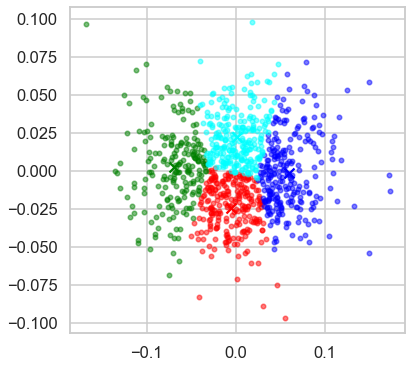

In [88]:
# Clustering
from sklearn.cluster import KMeans

#transform df to array
X = POS_array_reduced

km = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = km.fit(X)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

def display_cluster(X, km=km, n_clusters=0):
    color = ['red','blue','green','cyan','magenta','yellow', 'black', 'orange']
    alpha = 0.5
    s = 20
    if n_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(n_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1], c =color[i], alpha = alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

display_cluster(X, n_clusters=4)

<AxesSubplot:>

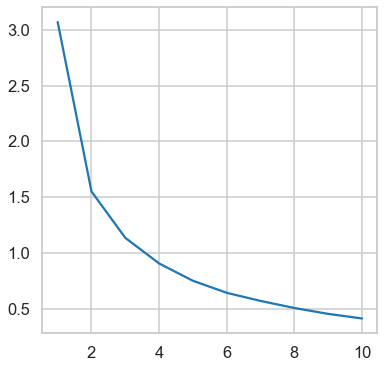

In [87]:
inertia = []
cluster_list = [*range(1,11)]
for num_clusters in range(1,11):
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

sns.lineplot(x=cluster_list, y=inertia)

In [96]:
POS_group_array = km.labels_

In [98]:
corpus_df['POS_GROUP'] = POS_group_array.tolist()

In [100]:
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,"[Palo Alto, Bay, Mountain View, New England, S...","[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955,"['Some nights, in my dreams, I find myself run...",3
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,"[Inverness County, Nova Scotia, Ontario, Toron...","[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672,"['She did not want to visit the old lady.', 'A...",2
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,"[California, Rome, Rome, Rome, California, Rom...","[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986,['Lea changed the sheets when she got up. She’...,2
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,"[Prospect Park, Kentucky, Tanglewood, East, Pr...","[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656,"['On or around May 5th of 2020, he just stoppe...",0
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,"[Cuba, Harpers]","[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186,"['It was late October, 1962. Russian missiles ...",2


In [101]:
corpus_df.POS_GROUP.value_counts()

1    253
3    252
0    236
2    203
Name: POS_GROUP, dtype: int64

In [118]:
corpus_df[corpus_df.AUTHOR == 'RAYMOND CARVER']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
690,https://www.newyorker.com/magazine/2007/12/24/...,BEGINNERS,RAYMOND CARVER,"December 16, 2007","['My friend Herb McGinnis, a cardiologist, was...",9404,friend cardiologist kitchen table drinking gin...,friend cardiologist kitchen table drinking gin...,friend cardiologist talk sit kitchen table dri...,friend cardiologist talk sit kitchen table dri...,...,"[1328, 1808, 438, 716]",0.309557,0.421445,0.102098,0.1669,"['My friend Herb McGinnis, a cardiologist, was...",2,My friend Herb McGinnis a cardiologist was tal...,"[My, friend, Herb, McGinnis, a, cardiologist, ...",4.068914


In [117]:
corpus_df[corpus_df.AUTHOR == 'ERNEST HEMINGWAY']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
81,https://www.newyorker.com/magazine/2020/06/08/...,PURSUIT AS HAPPINESS,ERNEST HEMINGWAY,"June 1, 2020",['That year we had planned to fish for marlin ...,5945,year marlin coast month month tenth tenth marl...,year marlin cuban coast month month tenth tent...,year plan fish marlin coast month month start ...,year plan fish marlin cuban coast month month ...,...,"[890, 996, 367, 398]",0.335722,0.375707,0.138438,0.150132,['That year we had planned to fish for marlin ...,2,That year we had planned to fish for marlin of...,"[That, year, we, had, planned, to, fish, for, ...",3.936906


In [116]:
corpus_df[corpus_df.AUTHOR == 'ANN BEATTIE']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
290,https://www.newyorker.com/magazine/2016/03/14/...,FOR THE BEST,ANN BEATTIE,"March 6, 2016",['The Clavells weren’t the sort to play pranks...,7019,sort prank invitation party son head e mail e...,sort prank invitation annual party son head e ...,sort play prank print invitation party arrive ...,sort play prank print invitation annual party ...,...,"[1098, 1274, 439, 483]",0.333333,0.386764,0.133273,0.146630,['The Clavells weren’t the sort to play pranks...,2,The Clavells weren’t the sort to play pranks s...,"[The, Clavells, weren’t, the, sort, to, play, ...",4.436260
304,https://www.newyorker.com/magazine/2015/11/23/...,SAVE A HORSE RIDE A COWGIRL,ANN BEATTIE,"November 15, 2015",['Heidi and Bree were rear-ended on Route 1 by...,6926,brother pickup girl sensation ice bag armpit t...,brother pickup girl odd sensation ice bag righ...,end drive brother pickup girl hurt feel sensat...,end drive brother pickup girl hurt feel odd se...,...,"[1213, 1203, 430, 503]",0.362198,0.359212,0.128397,0.150194,['Heidi and Bree were rear-ended on Route 1 by...,3,Heidi and Bree were rearended on Route 1 by St...,"[Heidi, and, Bree, were, rearended, on, Route,...",4.426649
336,https://www.newyorker.com/magazine/2015/04/20/...,MAJOR MAYBE,ANN BEATTIE,"April 13, 2015",['The red-haired homeless lady was arrested af...,2571,lady street taxi dash traffic action dog leash...,red haired homeless lady street taxi mad dash ...,lady arrest fall street taxi run dash traffic ...,red haired homeless lady arrest fall street ta...,...,"[531, 408, 190, 164]",0.410673,0.315545,0.146945,0.126837,['The red-haired homeless lady was arrested af...,1,The redhaired homeless lady was arrested after...,"[The, redhaired, homeless, lady, was, arrested...",4.403358
518,https://www.newyorker.com/magazine/2011/09/19/...,STARLIGHT,ANN BEATTIE,"September 12, 2011","['I said, “Oh, Ollie, we’re always glad to see...",3882,picture shot arm line place shoulder control w...,glad picture shot arm line place shoulder amus...,think need picture refute come shot suggest li...,glad think need picture refute come shot sugge...,...,"[641, 716, 191, 256]",0.355322,0.396896,0.105876,0.141907,"['I said, “Oh, Ollie, we’re always glad to see...",2,I said “Oh Ollie we’re always glad to see you ...,"[I, said, “Oh, Ollie, we’re, always, glad, to,...",4.215095
796,https://www.newyorker.com/magazine/2005/09/12/...,COPING STONES,ANN BEATTIE,"September 4, 2005",['Cahill—Dr. Cahill to those who knew him in h...,8927,town porch porch door end porch way kitchen wi...,small town porch current porch door far end ne...,know town decide screen porch relocate winteri...,know small town decide screen porch relocate w...,...,"[1607, 1644, 489, 581]",0.371905,0.380467,0.113168,0.134460,['Cahill—Dr. Cahill to those who knew him in h...,0,Cahill—Dr Cahill to those who knew him in his ...,"[Cahill—Dr, Cahill, to, those, who, knew, him,...",4.369329
851,https://www.newyorker.com/magazine/2004/04/12/...,THE RABBIT HOLE AS LIKELY EXPLANATION,ANN BEATTIE,"April 4, 2004",['My mother does not remember being invited to...,8641,mother wedding conversation lab blood medicati...,mother wedding conversation lab blood medicati...,mother remember invite wedding come conversati...,mother remember invite wedding come conversati...,...,"[1344, 1705, 397, 534]",0.337688,0.428392,0.099749,0.134171,['My mother does not remember being invited to...,2,My mother does not remember being invited to m...,"[My, mother, does, not, remember, being, invit...",4.198287
943,https://www.newyorker.com/magazine/2001/04/16/...,THAT LAST ODD DAY IN L.A.,ANN BEATTIE,"April 8, 2001",['Keller went back and forth about going into ...,9996,daughter niece nephew trip job holiday family ...,daughter niece nephew trip job holiday family 

In [115]:
corpus_df[corpus_df.AUTHOR == 'YIYUN LI']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
12,https://www.newyorker.com/magazine/2021/11/15/...,"HELLO, GOODBYE",YIYUN LI,"November 8, 2021","['Nina held between her hands baby-shaped air,...",5463,hand baby air hand head neck hand patting infa...,hand baby air left hand unseen head heavy supp...,hold hand baby shape air hand support head nec...,hold hand baby shape air left hand support uns...,...,"[933, 944, 318, 311]",0.372306,0.376696,0.126895,0.124102,"['Nina held between her hands baby-shaped air,...",0,Nina held between her hands babyshaped air her...,"[Nina, held, between, her, hands, babyshaped, ...",4.502838
144,https://www.newyorker.com/magazine/2019/03/11/...,ALL WILL BE WELL,YIYUN LI,"March 4, 2019","['Once upon a time, I was addicted to a salon....",4396,time salon haircut man uncle card table newspa...,time addicted salon haircut old man uncle card...,time salon wait haircut man uncle sit card tab...,time addicted salon wait haircut old man uncle...,...,"[775, 735, 253, 264]",0.382338,0.362605,0.124815,0.130242,"['Once upon a time, I was addicted to a salon....",0,Once upon a time I was addicted to a salon I n...,"[Once, upon, a, time, I, was, addicted, to, a,...",4.231996
164,https://www.newyorker.com/magazine/2018/10/01/...,WHEN WE WERE HAPPY WE HAD OTHER NAMES,YIYUN LI,"September 24, 2018",['The funeral director would be right with the...,4538,funeral director woman voice intercom bell por...,funeral director right woman voice intercom be...,funeral director woman voice intercom ring bel...,funeral director right woman voice intercom ri...,...,"[945, 657, 308, 225]",0.442623,0.307728,0.144262,0.105386,['The funeral director would be right with the...,1,The funeral director would be right with them ...,"[The, funeral, director, would, be, right, wit...",4.477694
185,https://www.newyorker.com/magazine/2018/04/23/...,A FLAWLESS SILENCE,YIYUN LI,"April 16, 2018","['A few times a year, around major Chinese hol...",5245,time year holiday e mail man life celebration...,time year major chinese holiday e - mail man l...,time year holiday receive e mail man meet lif...,time year major chinese holiday receive e mai...,...,"[918, 879, 284, 283]",0.388325,0.371827,0.120135,0.119712,"['A few times a year, around major Chinese hol...",0,A few times a year around major Chinese holida...,"[A, few, times, a, year, around, major, Chines...",4.390076
232,https://www.newyorker.com/magazine/2017/05/08/...,A SMALL FLAME,YIYUN LI,"May 1, 2017","['A girl, no older than ten, accosted Bella an...",5748,girl restaurant duck boyfriend time end trip r...,girl old restaurant famous duck boyfriend time...,girl accost leave restaurant duck boyfriend la...,girl old accost leave restaurant famous duck b...,...,"[1104, 861, 391, 285]",0.418023,0.326013,0.148050,0.107914,"['A girl, no older than ten, accosted Bella an...",1,A girl no older than ten accosted Bella and Pe...,"[A, girl, no, older, than, ten, accosted, Bell...",4.610753
248,https://www.newyorker.com/magazine/2017/01/09/...,ON THE STREET WHERE YOU LIVE,YIYUN LI,"January 1, 2017","['Had she been born in a different era, Becky ...",5271,era education governess nurse nourishment form...,different era education governess wet nurse no...,bear era think education qualify governess nur...,bear different era think education qualify gov...,...,"[989, 847, 302, 259]",0.412599,0.353358,0.125991,0.108052,"['Had she been born in a different era, Becky ...",0,Had she been born in a different era Becky tho...,"[Had, she, been, born, in, a, different, era, ...",4.461933
395,https://www.newyorker.com/magazine/2014/03/10/...,A SHELTERED WOMAN,YIYUN LI,"March 2, 2014","['The new mother, groggy from a nap, sat at th...",5841,mother nap table placemat bowl soybean foot so...,new mother groggy nap table placemat bowl soyb...,mot

In [114]:
corpus_df[corpus_df.AUTHOR == 'SALLY ROONEY']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
30,https://www.newyorker.com/magazine/2021/07/12/...,UNREAD MESSAGES,SALLY ROONEY,"July 5, 2021",['At twenty past twelve on a Wednesday afterno...,9027,afternoon woman desk office city center text d...,past afternoon woman desk office city center t...,afternoon woman sit desk share office city cen...,past afternoon woman sit desk share office cit...,...,"[1656, 1625, 525, 540]",0.381040,0.373907,0.120801,0.124252,['At twenty past twelve on a Wednesday afterno...,0,At twenty past twelve on a Wednesday afternoon...,"[At, twenty, past, twelve, on, a, Wednesday, a...",4.384505
143,https://www.newyorker.com/magazine/2019/03/18/...,COLOR AND LIGHT,SALLY ROONEY,"March 11, 2019",['The first time he sees her she’s getting int...,6291,time brother car seat passenger door eyebrow b...,time brother car seat passenger door eyebrow b...,time brother car sit seat close passenger door...,time brother car sit seat close passenger door...,...,"[927, 1182, 342, 523]",0.311701,0.397445,0.114997,0.175857,['The first time he sees her she’s getting int...,2,The first time he sees her she’s getting into ...,"[The, first, time, he, sees, her, she’s, getti...",4.175123


In [109]:
import re
import string

#add list of words
corpus_df['TEXT_STRIPPED'] = corpus_df.TEXT.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
corpus_df['TEXT_STRIPPED'] = corpus_df.TEXT_STRIPPED.map(lambda x: re.sub('xa0', ' ', x))
corpus_df['TEXT_WORDS'] = corpus_df.TEXT_STRIPPED.map(lambda x: re.split(' ', x))
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,"[Palo Alto, Bay, Mountain View, New England, S...","[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955,"['Some nights, in my dreams, I find myself run...",3,Some nights in my dreams I find myself running...,"[Some, nights, in, my, dreams, I, find, myself..."
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,"[Inverness County, Nova Scotia, Ontario, Toron...","[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672,"['She did not want to visit the old lady.', 'A...",2,She did not want to visit the old lady Amy stu...,"[She, did, not, want, to, visit, the, old, lad..."
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,"[California, Rome, Rome, Rome, California, Rom...","[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986,['Lea changed the sheets when she got up. She’...,2,Lea changed the sheets when she got up She’d b...,"[Lea, changed, the, sheets, when, she, got, up..."
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,"[Prospect Park, Kentucky, Tanglewood, East, Pr...","[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656,"['On or around May 5th of 2020, he just stoppe...",0,On or around May 5th of 2020 he just stopped H...,"[On, or, around, May, 5th, of, 2020, he, just,..."
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,"[Cuba, Harpers]","[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186,"['It was late October, 1962. Russian missiles ...",2,It was late October 1962 Russian missiles were...,"[It, was, late, October, 1962, Russian, missil..."


In [112]:
def word_length(text):
    word_lengths = []
    for word in text:
        word_lengths.append(len(word))
    return np.mean(word_lengths)

In [113]:
corpus_df['AVG_WORD_LENGTH'] = corpus_df.TEXT_WORDS.map(lambda x: word_length(x))
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
0,https://www.newyorker.com/magazine/2022/02/14/...,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself run...",9373,night dream hill dawn sun field sage eucalyptu...,night dream hill dawn sun field sage eucalyptu...,night dream find run hill dawn run smell sun c...,night dream find run hill dawn run smell sun c...,...,"[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955,"['Some nights, in my dreams, I find myself run...",3,Some nights in my dreams I find myself running...,"[Some, nights, in, my, dreams, I, find, myself...",4.176665
1,https://www.newyorker.com/magazine/2022/02/07/...,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'A...",7778,lady stroller bag boyfriend baby phone time de...,old lady stroller bag boyfriend baby phone tim...,want visit lady study stroller bag boyfriend b...,want visit old lady study stroller bag boyfrie...,...,"[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672,"['She did not want to visit the old lady.', 'A...",2,She did not want to visit the old lady Amy stu...,"[She, did, not, want, to, visit, the, old, lad...",4.271252
2,https://www.newyorker.com/magazine/2022/01/31/...,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022",['Lea changed the sheets when she got up. She’...,4866,sheet flower day tulip dresser carnation kitch...,sheet flower previous day tulip dresser carnat...,change sheet buy flower day tulip dresser carn...,change sheet buy flower previous day tulip dre...,...,"[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986,['Lea changed the sheets when she got up. She’...,2,Lea changed the sheets when she got up She’d b...,"[Lea, changed, the, sheets, when, she, got, up...",4.422515
3,https://www.newyorker.com/magazine/2022/01/24/...,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stoppe...",3469,5th bill minute earth evening cheering clankin...,5th bill minute earth precious evening cheerin...,5th stop stop exercise stop walk stop read sto...,5th stop stop exercise stop walk stop read sto...,...,"[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656,"['On or around May 5th of 2020, he just stoppe...",0,On or around May 5th of 2020 he just stopped H...,"[On, or, around, May, 5th, of, 2020, he, just,...",4.508111
4,https://www.newyorker.com/magazine/2022/01/17/...,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles ...",2687,missile word world end remark end world wife l...,late russian missile word world end common rem...,missile ship word world come end remark cheer ...,late russian missile ship word world come end ...,...,"[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186,"['It was late October, 1962. Russian missiles ...",2,It was late October 1962 Russian missiles were...,"[It, was, late, October, 1962, Russian, missil...",4.327211


In [119]:
corpus_df[corpus_df['AVG_WORD_LENGTH'] == corpus_df.AVG_WORD_LENGTH.min()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
838,https://www.newyorker.com/magazine/2004/08/09/...,ADAMS,GEORGE SAUNDERS,"August 1, 2004",['I never could stomach Adams and then one day...,1767,day kitchen underwear direction kid room head ...,day kitchen underwear direction kid room head ...,stomach day stand kitchen underwear face direc...,stomach day stand kitchen underwear face direc...,...,"[259, 318, 62, 155]",0.326196,0.400504,0.078086,0.195214,['I never could stomach Adams and then one day...,2,I never could stomach Adams and then one day h...,"[I, never, could, stomach, Adams, and, then, o...",3.798529


In [120]:
corpus_df[corpus_df['AVG_WORD_LENGTH'] == corpus_df.AVG_WORD_LENGTH.max()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH
179,https://www.newyorker.com/magazine/2018/06/04/...,FUNGUS,DAVID GILBERT,"May 28, 2018",['The insurance check came in the mail. From G...,6591,insurance check mail lizard mascot gecko disas...,insurance check mail big eyed lizard mascot co...,insurance check come mail lizard mascot gecko ...,insurance check come mail big eyed lizard masc...,...,"[1409, 943, 574, 421]",0.420974,0.281745,0.171497,0.125784,['The insurance check came in the mail. From G...,1,The insurance check came in the mail From Geic...,"[The, insurance, check, came, in, the, mail, F...",4.88823


In [145]:
#FIND AVERAGE SENTENCE LENGTH OF EACH STORY
import spacy
sp = spacy.load('en_core_web_lg')
doc = sp(corpus_df.TEXT[0])
word_counter = []
for sent in doc.sents:
    num_words = 0
    for word in sent:
        if word.pos_ != 'PUNCT':
            num_words += 1
    word_counter.append(num_words)
print(np.mean(word_counter))

25.389920424403183


In [142]:
def sent_length(text):
    word_counter = []
    doc = sp(text)
    for num, sent in enumerate(doc.sents):
        num_words = 0
        for word in sent:
            if word.pos_ != 'PUNCT':
                num_words += 1
        word_counter.append(num_words)
    return np.mean(word_counter)

In [146]:
corpus_df['AVG_SENT_LENGTH'] = corpus_df.TEXT.map(lambda x: sent_length(x))
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH,TEXT_SENT,AVG_SENT_LENGTH
0,https://www.newyorker.com/magazine/2022/02/14/annunciation,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",9373,night dream hill dawn sun field sage eucalyptus mist sheet hill footstep breath peloton cyclist morning fog neighborhood river asphalt road oak grace block time eye pool house moss bougainvillea f...,night dream hill dawn sun field sage eucalyptus mist starched sheet distant hill footstep breath peloton cyclist morning fog quiet wealthy neighborhood black river asphalt road great strong armed ...,night dream find run hill dawn run smell sun crisp field sage eucalyptus mist fall sheet hill press hear footstep breath peloton cyclist whir morning fog swallow descend neighborhood river asphalt...,night dream find run hill dawn run smell sun crisp field sage eucalyptus mist fall starched sheet distant hill press hear footstep breath peloton cyclist whir morning fog swallow descend quiet wea...,...,0.333104,0.134527,0.140955,"['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",3,Some nights in my dreams I find myself running through those hills above Palo Alto again It is always just before dawn and as I run I smell the suncrisped fields the sage the eucalyptus The mist f...,"[Some, nights, in, my, dreams, I, find, myself, running, through, those, hills, above, Palo, Alto, again, It, is, always, just, before, dawn, and, as, I, run, I, smell, the, suncrisped, fields, th...",4.176665,"[['Some nights, in my dreams, I find myself running through those hills above Palo Alto again, It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus...",25.389920
1,https://www.newyorker.com/magazine/2022/02/07/once-removed,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",7778,lady stroller bag boyfriend baby phone time degree cent humidity hour way stage icon event minute end min min bus min walk min effort afternoon abort mission baby phone number furnace shoulder hum...,old lady stroller bag boyfriend baby phone time degree cent humidity hour way stage icon olympic event separate minute end min min bus min walk min worth effort hot afternoon abort mission sorry b...,want visit lady study stroller bag boyfriend baby check phone time degree cent humidity accord hour way stage icon event minute break total end walk min train min bus min walk min effort afternoon...,want visit old lady study stroller bag boyfriend baby check phone time degree cent humidity accord hour way stage icon olympic event separate minute break total end walk min train min bus min walk...,...,0.348376,0.125206,0.187672,"['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",2,She did not want to visit the old lady Amy studied the stroller then the bags then her boyfriend and the baby She checked her phone 1126am It was time to go Ninety degrees ninetypercent humidity a...,"[She, did, not, want, to, visit, the, old, lady, Amy, studied, the, stroller, then, the, bags, then, her, boyfriend, and, the, baby, She, checked, her, phone, 1126am, It, was, time, to, go, Ninety...",4.271252,"[['She did not want to visit the old 

In [147]:
corpus_df[corpus_df['AVG_SENT_LENGTH'] == corpus_df.AVG_SENT_LENGTH.min()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH,TEXT_SENT,AVG_SENT_LENGTH
867,https://www.newyorker.com/magazine/2003/12/15/recuperation,RECUPERATION,RODDY DOYLE,"December 7, 2003","['He walks. Every day, he walks. That was what the doctor had said. All the doctors. Plenty of exercise, they’d told him. It was the one thing he’d really understood.', '—Are you a golf man, Mr. H...",2823,day doctor doctor plenty exercise thing golf man dog dog dog year garden day sunday dog way pup kid day way way day dog kid rain grave dog year kid time house town day dark work ground spade rabbi...,day doctor doctor plenty exercise thing golf man dog dog dog year garden day sunday dog way pup kid young day way way day dog kid upset upset rain grave dog year kid time house town right day dark...,walk day walk doctor doctor plenty exercise tell thing understand golf man walk walk dog dog bury dog year garden exercise walk day sunday like dog walk way pup kid day way way day walk dog die ki...,walk day walk doctor doctor plenty exercise tell thing understand golf man walk walk dog dog bury dog year garden exercise walk day sunday like dog walk way pup kid young day way way day walk dog ...,...,0.369451,0.127163,0.155756,"['He walks. Every day, he walks. That was what the doctor had said. All the doctors. Plenty of exercise, they’d told him. It was the one thing he’d really understood.', '—Are you a golf man, Mr. H...",2,He walks Every day he walks That was what the doctor had said All the doctors Plenty of exercise they’d told him It was the one thing he’d really understood —Are you a golf man Mr Hanahoe —No —Hil...,"[He, walks, Every, day, he, walks, That, was, what, the, doctor, had, said, All, the, doctors, Plenty, of, exercise, they’d, told, him, It, was, the, one, thing, he’d, really, understood, —Are, yo...",4.142756,NaN,6.719376


In [148]:
corpus_df[corpus_df['AVG_SENT_LENGTH'] == corpus_df.AVG_SENT_LENGTH.max()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,VERB_SCORE,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH,TEXT_SENT,AVG_SENT_LENGTH
103,https://www.newyorker.com/magazine/2020/01/06/playing-metal-gear-solid-v-the-phantom-pain,PLAYING METAL GEAR SOLID V: THE PHANTOM PAIN,JAMIL JAN KOCHAI,"December 30, 2019","['First, you have to gather the cash to preorder the game at the local GameStop, where your cousin works, and, even though he hooks it up with the employee discount, the game is still a bit out of...",2977,cash game cousin employee discount game bit price range paycheck pop work money hobby kid body compound businessman warlord dime street cash cousin game behalf day way store brother pound ass bicy...,cash game local cousin employee discount game bit price range paycheck pop work guilty money useless hobby kid body compound white businessman warlord literal dime street cash cousin game behalf d...,gather cash preorder game cousin work hook employee discount game bit price range use paycheck help pop work feel spend money hobby kid destroy body build compound businessman warlord scrimp sav...,gather cash preorder game local cousin work hook employee discount game bit price range use paycheck help pop work feel guilty spend money useless hobby kid destroy body build compound white busin...,...,0.323157,0.122859,0.125093,"['First, you have to gather the cash to preorder the game at the local GameStop, where your cousin works, and, even though he hooks it up with the employee discount, the game is still a bit out of...",1,First you have to gather the cash to preorder the game at the local GameStop where your cousin works and even though he hooks it up with the employee discount the game is still a bit out of your p...,"[First, you, have, to, gather, the, cash, to, preorder, the, game, at, the, local, GameStop, where, your, cousin, works, and, even, though, he, hooks, it, up, with, the, employee, discount, the, g...",4.32862,NaN,339.555556


In [149]:
pip install lexicalrichness

  Created wheel for lexicalrichness: filename=lexicalrichness-0.1.4-py2.py3-none-any.whl size=10075 sha256=da2c2b07a8bf37cb93ab184f24c75a38a816a2ee086f50aed97bd5f39cd47049
  Stored in directory: /Users/ami/Library/Caches/pip/wheels/31/75/3b/97ce33ce554684cf78db31f8b73ab185d5dfa8270453a1f26a
Successfully built lexicalrichness
Note: you may need to restart the kernel to use updated packages.


In [150]:
corpus_df.to_pickle("corpus_df_pos.pkl")

In [181]:
#get lexical richness of each text
from lexicalrichness import LexicalRichness

def lex_richness(doc):
    lex = LexicalRichness(doc)
    return lex.ttr

corpus_df['LEX_RICH'] = corpus_df.TEXT.map(lambda x: lex_richness(x))
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_NOUNS,TEXT_NOUNS_ADJS,TEXT_NOUNS_VERBS,TEXT_NOUNS_VERBS_ADJS,...,ADJ_SCORE,ADV_SCORE,TEXT_JOINED,POS_GROUP,TEXT_STRIPPED,TEXT_WORDS,AVG_WORD_LENGTH,TEXT_SENT,AVG_SENT_LENGTH,LEX_RICH
0,https://www.newyorker.com/magazine/2022/02/14/annunciation,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",9373,night dream hill dawn sun field sage eucalyptus mist sheet hill footstep breath peloton cyclist morning fog neighborhood river asphalt road oak grace block time eye pool house moss bougainvillea f...,night dream hill dawn sun field sage eucalyptus mist starched sheet distant hill footstep breath peloton cyclist morning fog quiet wealthy neighborhood black river asphalt road great strong armed ...,night dream find run hill dawn run smell sun crisp field sage eucalyptus mist fall sheet hill press hear footstep breath peloton cyclist whir morning fog swallow descend neighborhood river asphalt...,night dream find run hill dawn run smell sun crisp field sage eucalyptus mist fall starched sheet distant hill press hear footstep breath peloton cyclist whir morning fog swallow descend quiet wea...,...,0.134527,0.140955,"['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",3,Some nights in my dreams I find myself running through those hills above Palo Alto again It is always just before dawn and as I run I smell the suncrisped fields the sage the eucalyptus The mist f...,"[Some, nights, in, my, dreams, I, find, myself, running, through, those, hills, above, Palo, Alto, again, It, is, always, just, before, dawn, and, as, I, run, I, smell, the, suncrisped, fields, th...",4.176665,"[['Some nights, in my dreams, I find myself running through those hills above Palo Alto again, It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus...",25.389920,0.232551
1,https://www.newyorker.com/magazine/2022/02/07/once-removed,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",7778,lady stroller bag boyfriend baby phone time degree cent humidity hour way stage icon event minute end min min bus min walk min effort afternoon abort mission baby phone number furnace shoulder hum...,old lady stroller bag boyfriend baby phone time degree cent humidity hour way stage icon olympic event separate minute end min min bus min walk min worth effort hot afternoon abort mission sorry b...,want visit lady study stroller bag boyfriend baby check phone time degree cent humidity accord hour way stage icon event minute break total end walk min train min bus min walk min effort afternoon...,want visit old lady study stroller bag boyfriend baby check phone time degree cent humidity accord hour way stage icon olympic event separate minute break total end walk min train min bus min walk...,...,0.125206,0.187672,"['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",2,She did not want to visit the old lady Amy studied the stroller then the bags then her boyfriend and the baby She checked her phone 1126am It was time to go Ninety degrees ninetypercent humidity a...,"[She, did, not, want, to, visit, the, old, lady, Amy, studied, the, stroller, then, the, bags, then, her, boyfriend, and, the, baby, She, checked, her, phone, 1126am, It, was, time, to, go, Ninety...",4.271252,"[['She did not want to visit the old lady, ', 'A

<AxesSubplot:xlabel='AVG_SENT_LENGTH', ylabel='LEX_RICH'>

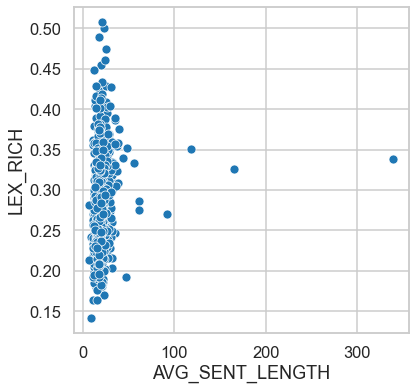

In [184]:
sns.scatterplot(data=corpus_df, x="AVG_SENT_LENGTH", y="LEX_RICH")

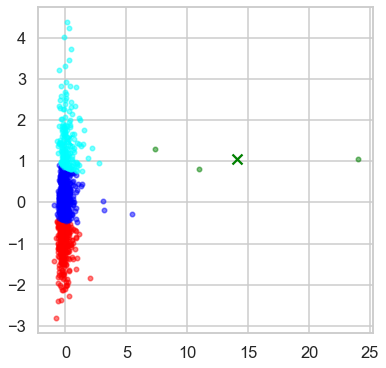

In [185]:
#scale then cluster
lex_df = corpus_df[['AVG_SENT_LENGTH','LEX_RICH']]
lex_array = lex_df.to_numpy()
X = lex_array
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

km = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = km.fit(X)

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

def display_cluster(X, km=km, n_clusters=0):
    color = ['red','blue','green','cyan','magenta','yellow', 'black', 'orange']
    alpha = 0.5
    s = 20
    if n_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(n_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1], c =color[i], alpha = alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

display_cluster(X, n_clusters=4)

In [218]:
combo_df = corpus_df[['NOUN_SCORE','VERB_SCORE','ADJ_SCORE','ADV_SCORE','AVG_SENT_LENGTH','LEX_RICH']]
X = combo_df.to_numpy()
X = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
pca.fit(X)
X = pca.transform(X)

<AxesSubplot:>

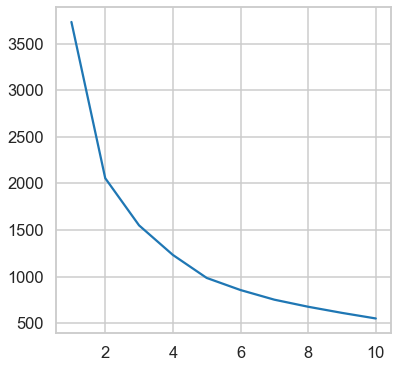

In [219]:
inertia = []
cluster_list = [*range(1,11)]
for num_clusters in range(1,11):
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

sns.lineplot(x=cluster_list, y=inertia)

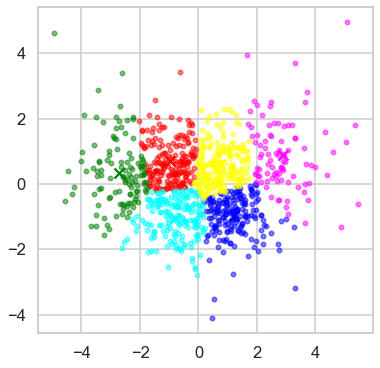

In [261]:
km = KMeans(n_clusters=6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = km.fit(X)

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

def display_cluster(X, km=km, n_clusters=0):
    color = ['red','blue','green','cyan','magenta','yellow', 'black', 'orange']
    alpha = 0.5
    s = 20
    if n_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(n_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1], c =color[i], alpha = alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

display_cluster(X, n_clusters=6)

In [262]:
combo_labels = km.labels_
combo_labels

array([5, 2, 2, 1, 0, 1, 0, 3, 1, 1, 5, 2, 3, 1, 4, 0, 1, 1, 5, 3, 5, 5,
       0, 1, 1, 3, 5, 1, 3, 0, 3, 0, 2, 4, 2, 5, 1, 0, 3, 5, 1, 1, 1, 0,
       1, 3, 0, 1, 2, 1, 0, 3, 3, 0, 4, 0, 4, 3, 5, 4, 3, 2, 0, 2, 3, 3,
       0, 0, 3, 5, 0, 3, 5, 0, 2, 0, 3, 0, 3, 0, 2, 0, 1, 3, 5, 1, 5, 5,
       4, 5, 0, 0, 1, 1, 0, 3, 0, 3, 2, 1, 2, 5, 4, 2, 3, 1, 3, 5, 3, 3,
       3, 5, 1, 4, 0, 0, 1, 0, 1, 4, 1, 0, 2, 5, 2, 0, 0, 1, 4, 3, 2, 1,
       5, 2, 5, 0, 5, 5, 0, 0, 1, 1, 2, 3, 5, 1, 0, 0, 0, 1, 3, 1, 3, 0,
       0, 2, 0, 1, 3, 2, 4, 5, 0, 1, 1, 4, 3, 0, 5, 2, 5, 5, 1, 5, 5, 0,
       5, 1, 4, 0, 0, 3, 1, 5, 3, 0, 2, 0, 3, 2, 0, 0, 0, 1, 3, 1, 4, 3,
       3, 3, 4, 2, 1, 1, 5, 5, 4, 3, 1, 0, 5, 0, 3, 0, 3, 0, 1, 2, 1, 5,
       1, 0, 5, 5, 4, 1, 0, 5, 2, 5, 2, 1, 4, 0, 3, 5, 0, 3, 5, 3, 0, 3,
       0, 5, 3, 5, 0, 1, 2, 0, 5, 0, 1, 4, 5, 3, 5, 3, 1, 5, 3, 1, 0, 5,
       5, 0, 1, 0, 2, 5, 4, 0, 1, 1, 4, 4, 0, 1, 0, 1, 3, 2, 5, 0, 5, 5,
       0, 4, 1, 0, 3, 1, 1, 2, 4, 4, 1, 1, 1, 2, 0,

In [263]:
corpus_df['COMBO_GROUP'] = combo_labels.tolist()
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP,x,y
0,https://www.newyorker.com/magazine/2022/02/14/annunciation,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",9373,"[Palo Alto, Bay, Mountain View, New England, San Francisco, Chinatown, San Francisco, Redwood City, Mountain View, Titania, Germany, Feuerzangenbowle, Redwood City, Mountain View, New York, Caribb...","[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955,25.389920,0.232551,5,-0.110135,0.051968
1,https://www.newyorker.com/magazine/2022/02/07/once-removed,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",7778,"[Inverness County, Nova Scotia, Ontario, Toronto, Montreal, Cape Breton, Turkey, Niagara Falls, Montreal]","[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672,15.590643,0.223521,2,-2.225387,1.399721
2,https://www.newyorker.com/magazine/2022/01/31/long-distance,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022","['Lea changed the sheets when she got up. She’d bought flowers the previous day, tulips that she’d put on the dresser. There were carnations on the kitchen table, in a squat glass vase. She though...",4866,"[California, Rome, Rome, Rome, California, Rome, Trastevere, the Ponte Sublicio, Everest, Rome, Rome, Rome, California, Ostiense, Rome, San Pietro, Vincoli, Rome, Rome, London, California]","[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986,15.984227,0.273125,2,-1.851762,0.069547
3,https://www.newyorker.com/magazine/2022/01/24/whats-the-deal-hummingbird,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stopped. He stopped exercising, stopped walking, stopped reading, stopped planning. He ate, drank, washed, and paid the bills, but that was it. He was seven...",3469,"[Prospect Park, Kentucky, Tanglewood, East, Provence, Montpellier, Nice, Brooklyn, West Orange, New Jersey, New Orleans, San Francisco, New York, Corfu, America, America, America, America, America...","[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656,17.959799,0.379558,1,0.445306,-0.538206
4,https://www.newyorker.com/magazine/2022/01/17/fireworks,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles were being shipped to Cuba. Kennedy was having words with Khrushchev. The world might be coming to an end.', 'It was a common remark: “Cheer up, it’s ...",2687,"[Cuba, Harpers]","[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186,15.189189,0.311994,0,-1.339362,1.120938


In [264]:
corpus_df[corpus_df.AUTHOR == 'ANN BEATTIE']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP,x,y
290,https://www.newyorker.com/magazine/2016/03/14/for-the-best,FOR THE BEST,ANN BEATTIE,"March 6, 2016","['The Clavells weren’t the sort to play pranks, so the printed invitation to their annual Christmas party arrived after what Gerald and Charlotte’s son, Timothy, would call a “heads-up,” sent by e...",7019,"[Charlotte, Charlotte, Charlotte, the East Side, Charlotte, Charlotte, Central Park West, Seattle, California, Charlotte, Maine, Santa, Dublin, Charlotte, Charlotte, New Haven, Italy, Rome, Califo...","[1098, 1274, 439, 483]",0.333333,0.386764,0.133273,0.146630,16.325893,0.264628,0,-1.676109,0.434410
304,https://www.newyorker.com/magazine/2015/11/23/save-a-horse-ride-a-cowgirl,SAVE A HORSE RIDE A COWGIRL,ANN BEATTIE,"November 15, 2015","['Heidi and Bree were rear-ended on Route 1 by Sterne Clough, driving his brother’s Ford pickup. Neither girl seemed hurt. Sterne, though, felt the oddest sensation. It was as if someone had clamp...",6926,"[Kittery, Boston, New York, Portsmouth, Michigan, Portsmouth, Portsmouth, Prescott Park, Newfoundland, India, Maine, Vietnam, Portsmouth, Vietnam, New York City, Maine, y’, Vietnam, America, Maine...","[1213, 1203, 430, 503]",0.362198,0.359212,0.128397,0.150194,16.582569,0.275186,0,-0.939890,0.312714
336,https://www.newyorker.com/magazine/2015/04/20/major-maybe,MAJOR MAYBE,ANN BEATTIE,"April 13, 2015","['The red-haired homeless lady was arrested after she fell in the street and a taxi almost ran over her. Just before her mad dash into traffic (who could account for her actions?), she’d accused a...",2571,"[Plaza, Columbus, Ohio, Portland, Maine, New York, Cape Neddick, Maine, New York City, New York, New York, Brooklyn, Atlanta, New York City, Portland, Maine, Portland, Portland]","[531, 408, 190, 164]",0.410673,0.315545,0.146945,0.126837,23.298246,0.384016,4,2.060963,0.466605
518,https://www.newyorker.com/magazine/2011/09/19/starlight-ann-beattie,STARLIGHT,ANN BEATTIE,"September 12, 2011","['I said, “Oh, Ollie, we’re always glad to see you, but I don’t think we need any pictures now.”', 'Dick refutes me. “Oh, come on, Ollie. Take a few shots.”', 'Dolly gets up and suggests that we l...",3882,"[California, California, the West Coast, China, the Soviet Union, New Jersey, Paris, the United States, England, San Clemente, California, Pacific, Starlight, New York, Malibu]","[641, 716, 191, 256]",0.355322,0.396896,0.105876,0.141907,14.489209,0.296703,3,-1.732562,-0.665585
796,https://www.newyorker.com/magazine/2005/09/12/coping-stones,COPING STONES,ANN BEATTIE,"September 4, 2005","['Cahill—Dr. Cahill to those who knew him in his small town in Maine—had decided that his screened porch should be relocated. Wouldn’t it be better to winterize the current porch, adding a door at...",8927,"[Maine, Canada, East, Orono, Maine, Portsmouth, Portsmouth, Warren, Hawaii, Warren, Syracuse, Syracuse, Byron, Portsmouth, New Hampshire, the Taj Mahal, Maine]","[1607, 1644, 489, 581]",0.371905,0.380467,0.113168,0.134460,17.901734,0.256964,3,-1.267999,-0.852120
851,https://www.newyorker.com/magazine/2004/04/12/the-rabbit-hole-as-likely-explanation,THE RABBIT HOLE AS LIKELY EXPLANATION,ANN BEATTIE,"April 4, 2004","['My mother does not remember being invited to my first wedding. This comes up in conversation when I pick her up from the lab, where blood has been drawn to see how she’s doing on her medication....",8641,"[Brunei, Brunei, New York City, Las Vegas, London, Wordsworth, Ohio, Virginia, Ohio, Ohio, Washington, South, Ohio, the West Coast, Lee Park, Lee Park, Lee Park, London, FedEx, Virginia, Baltimore]","[1344, 1705, 397, 534]",0.337688,0.428392,0.099749,0.134171,15.368243,0.215016,2,-3.056834,-1.381730
943,https://www.newyorker.com/magazine/2001/04/16/that-last-odd-day-in-l-a,THAT LAST ODD DAY IN L.A.,ANN BEATTIE,"April 8, 2001","['Keller went back and forth about

In [231]:
corpus_df[corpus_df.AUTHOR == 'HARUKI MURAKAMI']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP
82,https://www.newyorker.com/magazine/2020/06/08/confessions-of-a-shinagawa-monkey,CONFESSIONS OF A SHINAGAWA MONKEY,HARUKI MURAKAMI,"June 1, 2020","['I met that elderly monkey in a small Japanese-style inn in a hot-springs town in Gunma Prefecture, some five years ago. It was a rustic or, more precisely, decrepit inn, barely hanging on, where...",6103,"[Gunma Prefecture, Tokyo, the Gotenyama Garden, Takasakiyama, Tokyo, Tokyo, Gunma Prefecture, Akasaka, Samezu, Shinagawa, Higashioi, Shinagawa]","[1086, 993, 449, 510]",0.357472,0.326860,0.147795,0.167874,15.587224,0.252603,1
97,https://www.newyorker.com/magazine/2020/02/17/with-the-beatles,WITH THE BEATLES,HARUKI MURAKAMI,"February 10, 2020","['What I find strange about growing old isn’t that I’ve got older. Not that the youthful me from the past has, without my realizing it, aged. What catches me off guard is, rather, how people from ...",9237,"[Beatlemania, Kobe, Japan, U.K., U.S., North Vietnam, U.S., Hollywood, Hollywood, Sayoko, Iron Crosses, Sayoko, Tokyo, Shibuya, Kansai, Mt. Rokko, Kobe, Mt. Rokko, Tokyo, Tokyo, Sayoko, Sayoko, Sa...","[1513, 1441, 636, 772]",0.346859,0.330353,0.145805,0.176983,16.817863,0.210997,3
149,https://www.newyorker.com/magazine/2019/01/28/cream,CREAM,HARUKI MURAKAMI,"January 21, 2019",['So I’m telling a younger friend of mine about a strange incident that took place back when I was eighteen. I don’t recall exactly why I brought it up. It just happened to come up as we were talk...,4968,"[Kobe, Kobe, Kobe]","[868, 779, 350, 395]",0.362876,0.325669,0.146321,0.165134,16.661238,0.256226,1
168,https://www.newyorker.com/magazine/2018/09/03/the-wind-cave,THE WIND CAVE,HARUKI MURAKAMI,"August 27, 2018","['When I was fifteen, my younger sister died. It happened very suddenly. She was twelve then, in her first year of junior high. She had been born with a congenital heart problem, but since her las...",4140,"[Yamanashi Prefecture, Yamanashi, Kofu, Mt. Fuji, Mt. Fuji, Komichi, Micchi, Micchan, Wonderland, Tokyo]","[738, 663, 293, 337]",0.363368,0.326440,0.144264,0.165928,15.756458,0.278908,1
343,https://www.newyorker.com/magazine/2015/02/23/kino,KINO,HARUKI MURAKAMI,"February 16, 2015","['The man always sat in the same seat, the stool farthest down the counter. When it wasn’t occupied, that is, but it was nearly always free. The bar was seldom crowded, and that particular seat wa...",9047,"[Okayama, Tokyo, Japan, Tokyo, Kasai, Aoyama, Roppongi, Kasai, Kamita, Kamita, Kamita, Kamita, Tokyo, Georgia, Tokyo, Tokyo, Kamita, Takamatsu, Shikoku, Kyushu, Takamatsu, Kyushu, Kumamoto, Kyushu...","[1581, 1531, 624, 677]",0.358260,0.346930,0.141400,0.153410,16.175862,0.217382,3
362,https://www.newyorker.com/magazine/2014/10/13/scheherazade-3,SCHEHERAZADE,HARUKI MURAKAMI,"October 6, 2014","['Each time they had sex, she told Habara a strange and gripping story afterward. Like Queen Scheherazade in “A Thousand and One Nights.” Though, of course, Habara, unlike the king, had no plan to...",7944,"[Habara, Habara, the North Pole, Tokyo, Barcelona, Habara]","[1447, 1215, 511, 618]",0.381693,0.320496,0.134793,0.163018,15.302632,0.229735,1
382,https://www.newyorker.com/magazine/2014/06/09/yesterday-3,YESTERDAY,HARUKI MURAKAMI,"June 2, 2014","['As far as I know, the only person ever to put Japanese lyrics to the Beatles song “Yesterday” (and to do so in the distinctive Kansai dialect, no less) was a guy named Kitaru. He used to belt ou...",8570,"[Kansai, Kansai, Kansai, Ota Ward, Tokyo, Kansai, Denenchofu, Kansai, Kansai, Kansai, Tokyo, Tokyo, Tokyo, Kansai, Kansai, Kansai, Kansai, Kansai, Kansai, Kobe, Ashiya, Kobe, Kansai, Tokyo, Tokyo,...","[1190, 1567, 575, 754]",0.291238,0.383505,0.140724,0.184533,14.659128,0.196226,3
413,https://www.newyorker.com/magazine/2013/10/28/samsa-in-love,SAMSA IN LOVE,HARUKI MURAKAMI,"October 21, 2013","['He 

In [232]:
corpus_df[corpus_df.AUTHOR == 'GEORGE SAUNDERS']

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP
22,https://www.newyorker.com/magazine/2021/08/30/the-mom-of-bold-action,THE MOM OF BOLD ACTION,GEORGE SAUNDERS,"August 23, 2021","['Again she found herself spending her precious morning writing time pacing her lovable sty of a kitchen making no progress at all. Why was she holding a can opener?', 'Hmm.', 'That could be somet...",7921,"[Florence, Cliff, Cliff, China, California, Ohio, Maury]","[1350, 1345, 563, 609]",0.349108,0.347815,0.145591,0.157486,12.413011,0.230808,3
62,https://www.newyorker.com/magazine/2020/11/09/ghoul,GHOUL,GEORGE SAUNDERS,"November 2, 2020","['At noon Layla wheels over Vat of Lunch. For a sec I can be not-scary, leaning against our plastiform wall meant to resemble human entrails.', '“Why aren’t the old served first?” crabs Leonard, S...",7465,"[CHICAGO, Bowling, ALPS RESORT, Pueblo, Colorado, Pueblo, Colorado, CHICAGO, Slough, the Cliff of Unceasing Desire, Food Chutes, Clinic, CALI CREEK]","[993, 1326, 491, 635]",0.288244,0.384906,0.142525,0.184325,24.410256,0.258546,3
91,https://www.newyorker.com/magazine/2020/04/06/love-letter,LOVE LETTER,GEORGE SAUNDERS,"March 30, 2020","['February 22, 202_.', 'Dear Robbie,', 'Got your e-mail, kid. Sorry for handwriting in reply. Not sure e-mailing is the best move, considering the topic, but, of course (you being nearly six foot ...",2853,"[Bremerton, Point Lobos, Monterey, Catskills, Reno, Lowell, Waterville]","[475, 460, 193, 196]",0.358761,0.347432,0.145770,0.148036,19.917241,0.314446,1
122,https://www.newyorker.com/magazine/2019/08/19/elliott-spencer,ELLIOTT SPENCER,GEORGE SAUNDERS,"August 12, 2019","['Today is to beu2003Parts of theu2003Parts of my', 'Sure, Jeru2003Please dou2003Point at parts of me while saying the name of it off our list of Words Worth Knowing.', 'Agespot', 'Finger', 'Wrist...",6184,"[another\u2003Can, Root Beer, sad\u2003At all\u2003Though, Jer!\u2003Kudos, the Park District, Allentown, Pennsylvania, Galena, Illinois, Cleveland, KTODNewsTeamTwo, Hefty bag\u2003In, Schenectady...","[958, 1134, 419, 468]",0.321584,0.380665,0.140651,0.157100,15.191748,0.298875,3
294,https://www.newyorker.com/magazine/2016/02/08/mothers-day-fiction-george-saunders,MOTHER'S DAY,GEORGE SAUNDERS,"January 31, 2016","['The trees along Pine Street that every spring bloomed purple flowers had bloomed purple flowers. So what? What was the big deal? It happened every spring. Pammy kept saying, “Look at the flowers...",7032,"[Ohio, Ohio, Ohio, Phoenix, Granada, Cloverish, St. Caspian’s, St. Caspian’s]","[1027, 1208, 488, 604]",0.308687,0.363090,0.146679,0.181545,11.010479,0.244909,3
465,https://www.newyorker.com/magazine/2012/10/15/the-semplica-girl-diaries,THE SEMPLICA-GIRL DIARIES,GEORGE SAUNDERS,"October 8, 2012","['Having just turned forty, have resolved to embark on grand project of writing every day in this new black book just got at OfficeMax. Exciting to think how in one year, at rate of one page/day, ...",8874,"[Lafayette, Lafayette, China, Guatemala, Burma, Nevada, Bahamas, Hawaii, America, Lexington, Laos, Moldova, Somalia, Philippines, Germany, Kuwait, Filipina, Europe, Alps, Alps, Europe, China, Lemo...","[1934, 1577, 800, 674]",0.387964,0.316349,0.160481,0.135206,13.024217,0.264053,1
513,https://www.newyorker.com/magazine/2011/10/31/tenth-of-december,TENTH OF DECEMBER,GEORGE SAUNDERS,"October 24, 2011",['The pale boy with unfortunate Prince Valiant bangs and cublike mannerisms hulked to the mudroom closet and requisitioned Dad’s white coat. Then requisitioned the boots he’d spray-painted white. ...,8614,"[Earth, Montreal, El Cirro, Montreal, Nether, Fresno, California, Mississippi, Ozarks, New England, Uranus, Boulder, Poole, Santa Fe]","[1496, 1440, 561, 701]",0.356360,0.343020,0.133635,0.166984,11.565499,0.233708,3
530,https://www.newyorker.com/magazine/2011/06/13/home-george-saunders,HOME,GEORGE SAUNDERS,"June 6, 201

In [247]:
corpus_df[corpus_df.COMBO_GROUP == 0][['TITLE','AUTHOR','DATE']][0:10]

,TITLE,AUTHOR,DATE
3,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022"
5,WHAT THE FOREST REMEMBERS,JENNIFER EGAN,"December 27, 2021"
8,A SHOOTING IN RATHREEDANE,COLIN BARRETT,"December 6, 2021"
9,MARRIAGE QUARANTINE,KATE WALBERT,"November 29, 2021"
13,THE HAUNTING OF HAJJI HOTAK,JAMIL JAN KOCHAI,"November 1, 2021"
16,NOT HERE YOU DON'T,THOMAS MCGUANE,"October 11, 2021"
17,THE GHOST BIRDS,KAREN RUSSELL,"October 4, 2021"
21,THE MONKEY WHO SPEAKS,HAN ONG,"September 6, 2021"
23,THE ICEMAN,EMMA CLINE,"August 16, 2021"
24,SELECTION WEEK,HURMAT KAZMI,"August 9, 2021"


In [249]:
corpus_df[corpus_df.COMBO_GROUP == 1][['TITLE','AUTHOR','DATE']][0:10]

,TITLE,AUTHOR,DATE
0,ANNUNCIATION,LAUREN GROFF,"February 7, 2022"
10,THE HOLLOW,GREG JACKSON,"November 22, 2021"
15,THE UMBRELLA,TOVE DITLEVSEN,"October 18, 2021"
18,RED PYRAMID,VLADIMIR SOROKIN,"September 27, 2021"
20,YENTE,OLGA TOKARCZUK,"September 13, 2021"
26,CODA,TESSA HADLEY,"July 26, 2021"
29,YOUNG GIRLS,MARCEL PROUST,"July 5, 2021"
31,MY APOLOGY,SAM LIPSYTE,"June 28, 2021"
35,BEFORE THE VALLEY,RACHEL HENG,"May 31, 2021"
39,BALLOONS,THOMAS MCGUANE,"May 3, 2021"


In [250]:
corpus_df[corpus_df.COMBO_GROUP == 2][['TITLE','AUTHOR','DATE']][0:10]

,TITLE,AUTHOR,DATE
7,"LU, RESHAPING",MADELEINE THIEN,"December 13, 2021"
12,"HELLO, GOODBYE",YIYUN LI,"November 8, 2021"
19,DESIRE,ESTHER FREUD,"September 20, 2021"
25,SUPERSTITION,SARAH BRAUNSTEIN,"August 2, 2021"
28,SATELLITES,REBECCA CURTIS,"July 5, 2021"
30,UNREAD MESSAGES,SALLY ROONEY,"July 5, 2021"
38,CHILDREN OF THE GOOD BOOK,J. M. HOLMES,"May 10, 2021"
45,THE CASE FOR AND AGAINST LOVE POTIONS,IMBOLO MBUE,"March 15, 2021"
46,THE SHAPE OF A TEARDROP,T. CORAGHESSAN BOYLE,"March 8, 2021"
50,A WRINKLE IN THE REALM,BEN OKRI,"February 1, 2021"


In [251]:
corpus_df[corpus_df.COMBO_GROUP == 3][['TITLE','AUTHOR','DATE']][0:10]

,TITLE,AUTHOR,DATE
1,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022"
2,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022"
4,FIREWORKS,GRAHAM SWIFT,"January 10, 2022"
6,A LOT OF THINGS HAVE HAPPENED,ADAM LEVIN,"December 20, 2021"
11,DETECTIVE DOG,GISH JEN,"November 15, 2021"
22,THE MOM OF BOLD ACTION,GEORGE SAUNDERS,"August 23, 2021"
32,OFFSIDE CONSTANTLY,CAMILLE BORDAS,"June 21, 2021"
34,FOSTER,BRYAN WASHINGTON,"June 7, 2021"
37,THE PARTY,KEITH RIDGWAY,"May 17, 2021"
48,GOOD-LOOKING,SOUVANKHAM THAMMAVONGSA,"February 22, 2021"


In [252]:
corpus_df[corpus_df.COMBO_GROUP == 4][['TITLE','AUTHOR','DATE']][0:10]

,TITLE,AUTHOR,DATE
14,THE DEPLETION PROMPTS,DAVID MEANS,"October 25, 2021"
33,THE COAST OF NEW ZEALAND,CYNTHIA OZICK,"June 14, 2021"
54,"""THE RIVALS""",ANDREA LEE,"December 28, 2020"
57,RWANDA,JOHN EDGAR WIDEMAN,"December 7, 2020"
60,THE OLD MAN IN THE PIAZZA,SALMAN RUSHDIE,"November 16, 2020"
89,THE MEDIA,BEN LERNER,"April 13, 2020"
103,PLAYING METAL GEAR SOLID V: THE PHANTOM PAIN,JAMIL JAN KOCHAI,"December 30, 2019"
108,ARIZONA,JOHN EDGAR WIDEMAN,"November 18, 2019"
112,THE BUNTY CLUB,TESSA HADLEY,"October 21, 2019"
114,SINNERS IN THE HANDS OF AN ANGRY GOD,JOYCE CAROL OATES,"October 7, 2019"


In [291]:
corpus_df.to_pickle("corpus_df_style.pkl")

In [227]:
corpus_df = pd.read_pickle('corpus_df_style.pkl')

In [228]:
corpus_df = corpus_df.drop(columns=['POS_GROUP', 'TEXT_NOUNS', 'TEXT_NOUNS_VERBS', 
                                    'TEXT_NOUNS_ADJS', 'TEXT_NOUNS_VERBS_ADJS', 
                                    'TEXT_STRIPPED','TEXT_JOINED', 'TEXT_WORDS', 'TEXT_SENT', 'AVG_WORD_LENGTH'])
corpus_df.head()

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP
0,https://www.newyorker.com/magazine/2022/02/14/annunciation,ANNUNCIATION,LAUREN GROFF,"February 7, 2022","['Some nights, in my dreams, I find myself running through those hills above Palo Alto again. It is always just before dawn, and as I run I smell the sun-crisped fields, the sage, the eucalyptus. ...",9373,"[Palo Alto, Bay, Mountain View, New England, San Francisco, Chinatown, San Francisco, Redwood City, Mountain View, Titania, Germany, Feuerzangenbowle, Redwood City, Mountain View, New York, Caribb...","[1705, 1451, 586, 614]",0.391414,0.333104,0.134527,0.140955,25.389920,0.232551,1
1,https://www.newyorker.com/magazine/2022/02/07/once-removed,ONCE REMOVED,ALEXANDER MACLEOD,"January 31, 2022","['She did not want to visit the old lady.', 'Amy studied the stroller, then the bags, then her boyfriend and the baby. She checked her phone: 11:26a.m. It was time to go. Ninety degrees, ninety-pe...",7778,"[Inverness County, Nova Scotia, Ontario, Toronto, Montreal, Cape Breton, Turkey, Niagara Falls, Montreal]","[1231, 1266, 455, 682]",0.338745,0.348376,0.125206,0.187672,15.590643,0.223521,3
2,https://www.newyorker.com/magazine/2022/01/31/long-distance,LONG DISTANCE,AYSEGUL SAVAS,"January 24, 2022","['Lea changed the sheets when she got up. She’d bought flowers the previous day, tulips that she’d put on the dresser. There were carnations on the kitchen table, in a squat glass vase. She though...",4866,"[California, Rome, Rome, Rome, California, Rome, Trastevere, the Ponte Sublicio, Everest, Rome, Rome, Rome, California, Ostiense, Rome, San Pietro, Vincoli, Rome, Rome, London, California]","[763, 903, 284, 328]",0.334943,0.396400,0.124671,0.143986,15.984227,0.273125,3
3,https://www.newyorker.com/magazine/2022/01/24/whats-the-deal-hummingbird,"WHAT'S THE DEAL, HUMMINGBIRD?",ARTHUR KRYSTAL,"January 17, 2022","['On or around May 5th of 2020, he just stopped. He stopped exercising, stopped walking, stopped reading, stopped planning. He ate, drank, washed, and paid the bills, but that was it. He was seven...",3469,"[Prospect Park, Kentucky, Tanglewood, East, Provence, Montpellier, Nice, Brooklyn, West Orange, New Jersey, New Orleans, San Francisco, New York, Corfu, America, America, America, America, America...","[609, 603, 204, 187]",0.379913,0.376170,0.127261,0.116656,17.959799,0.379558,0
4,https://www.newyorker.com/magazine/2022/01/17/fireworks,FIREWORKS,GRAHAM SWIFT,"January 10, 2022","['It was late October, 1962. Russian missiles were being shipped to Cuba. Kennedy was having words with Khrushchev. The world might be coming to an end.', 'It was a common remark: “Cheer up, it’s ...",2687,"[Cuba, Harpers]","[407, 424, 147, 202]",0.344915,0.359322,0.124576,0.171186,15.189189,0.311994,3


In [229]:
corpus_df.to_pickle("corpus_df_style3.pkl")

In [256]:
corpus_df['x'] = (X[:,0]).tolist()

In [257]:
corpus_df['y'] = (X[:,1]).tolist()

In [272]:
ann_beattie = corpus_df[corpus_df.AUTHOR == 'ANN BEATTIE']
george_saunders = corpus_df[corpus_df.AUTHOR == 'GEORGE SAUNDERS']
murakami = corpus_df[corpus_df.AUTHOR == 'HARUKI MURAKAMI']
munro = corpus_df[corpus_df.AUTHOR == 'ALICE MUNRO']

In [351]:
import plotly.express as px

fig = px.scatter(corpus_df, x="x", y = "y", color="COMBO_GROUP", hover_name="TITLE", hover_data=["AUTHOR"])

fig.update_layout(
    title_text='K-Means Clustering Based on Writing Style')

fig.show()

In [348]:
import plotly.express as px

fig = px.scatter(george_saunders, x="x", y = "y", text="TITLE", color="COMBO_GROUP")
fig.update_traces(textposition='top right')

fig.update_layout(
    height=600,
    width=900,
    title_text='Writing Style of George Saunders Stories'
)
fig.show()

In [302]:
fig = px.scatter(murakami, x="x", y = "y", text="TITLE", color="COMBO_GROUP", size="COMBO_GROUP")

fig.show()

In [350]:
fig = px.scatter(munro, x="x", y = "y", text="TITLE", color="COMBO_GROUP")
fig.update_traces(textposition='top right')

fig.update_layout(
    height=600,
    width=900,
    title_text='Writing Style of Alice Munro Stories')
fig.show()

In [326]:
corpus_df[corpus_df.NOUN_SCORE == corpus_df.NOUN_SCORE.max()]

,URL,TITLE,AUTHOR,DATE,TEXT,WORDCOUNT,TEXT_ENTS,POS_COUNT,NOUN_SCORE,VERB_SCORE,ADJ_SCORE,ADV_SCORE,AVG_SENT_LENGTH,LEX_RICH,COMBO_GROUP,x,y
850,https://www.newyorker.com/magazine/2004/04/19/cat-n-mouse,CAT 'N' MOUSE,STEVEN MILLHAUSER,"April 11, 2004","['The cat is chasing the mouse through the kitchen: between the blue chair legs, over the tabletop with its red-and-white checkered tablecloth that is already sliding in great waves, past the suga...",5608,[],"[1475, 802, 364, 217]",0.516095,0.280616,0.127362,0.075927,15.365854,0.241496,1,3.316554,-3.173926


In [321]:
murakami.NOUN_SCORE.mean()

0.3547972533353102

In [322]:
george_saunders.NOUN_SCORE.mean()

0.33611139458093775

In [323]:
ann_beattie.NOUN_SCORE.mean()

0.3625810087074123

In [299]:
corpus_df.WORDCOUNT.mean()

5716.656779661017

In [295]:
corpus_df.AUTHOR.nunique()

333

In [296]:
corpus_df.AUTHOR.value_counts()

TESSA HADLEY            26
THOMAS MCGUANE          20
T. CORAGHESSAN BOYLE    19
GEORGE SAUNDERS         17
ALICE MUNRO             17
                        ..
COLUM MCCANN             1
J. M.  HOLMES            1
CATHERINE LACEY          1
HENRY ROTH               1
J. M. COETZEE            1
Name: AUTHOR, Length: 333, dtype: int64

In [330]:
X1 = POS_array_reduced
corpus_df['x1'] = (X1[:,0]).tolist()
corpus_df['y1'] = (X1[:,1]).tolist()


In [336]:
fig = px.scatter(corpus_df, x="x1", y = "y1", color="COMBO_GROUP", hover_name="TITLE", hover_data=["AUTHOR"])
fig.show()